# Language Identification Challenge
© Explore Data Science Academy

##### Nozipho Bhila
---


## File descriptions

train_set.csv - the training set

test_set.csv - the test set

## Language IDs

afr - Afrikaans

eng - English

nbl - isiNdebele

nso - Sepedi

sot - Sesotho

ssw - siSwati

tsn - Setswana

tso - Xitsonga

ven - Tshivenda

xho - isiXhosa

zul - isiZulu

---

<a id="cont"></a>
## Table of Contents<a id="content"></a>


* [1. Problem Statement](#chapter1)
<br/><br/>    
* [2. Import Relevant packages](#chapter2)
     * [2.1 Installing packages](#section_2_1)
     * [2.2 Importing packages](#section_2_2)
<br/><br/>
* [3. Loading Data](#chapter3)
<br/><br/>
* [4. Exploratory Data Analysis (EDA)](#chapter4)
  * [4.1. Overview of the Training Dataset](#section_4_1)
   * [4.1.1 Brief overview of the train_data](#sub_section_4_1_1)
   * [4.1.2. the shap of the training dataframe](#sub_section_4_1_2)
  * [4.2. Bar plot of label classes](#section_4_2)
   * [4.2.1.  taking a look at the text column](#sub_section_4_2_1)
<br/><br/>
* [5. Clean the Data](#chapter5)
    * [5.1. Text Cleaning](#section_5_1)
     * [5.1.1 Remove Punctuations from train](#sub_section_5_1_1)
     * [5.1.2 Remove Punctuations from Test](#sub_section_5_1_2)
    * [5.2.  Drop Duplicate Columns](#section_5_2)
     * [5.2.1 Lowercase the reviews ](#sub_section_5_2_1)
     * [5.2.2 Remove digits and words containing digits](#sub_section_5_2_2)
<br/><br/>
* [6. Feature Engineering](#chapter6)
   * [6.1. Label Encoder](#section_6_1)
   * [6.2. ContVectorizer](#section_6_2)
    * [6.2.1 Applying ContVectorizer to Train Data ](#sub_section_6_2_1)
    * [6.2.2 Applying ContVectorizer to Test Data](#sub_section_6_2_2)
   * [6.3 Split Data ](#section_6_3)
<br/><br/>
* [7. Modeling](#chapter7)
   * [7.1. Fitting the Model](#section_7_1)
   * [7.2. Applying Prediction to the Model](#section_7_2)
<br/><br/>   
* [8. Model performances](#chapter8)
   * [8.1. Using Seaborn's Countplot function](#section_8_1)
   * [8.2. Applying the model to make prediction on an unseen data](#section_8_2)
   * [8.3. Creating a dataframe for the prediction](#section_8_3)
   * [8.4. saving the file as csv for submission ](#section_8_4)

## 1. EXPLORE Data Science Academy Classification Hackathon
## Introduction 

### 
South Africa is a multicultural society with rich linguistic diversity, where language plays a crucial role in enhancing democracy and shaping various aspects of societal life. The nation is multilingual, boasting 11 official languages, each enjoying equal status. The majority of South Africans are multilingual, proficient in speaking two or more official languages. This linguistic diversity contributes significantly to the social, cultural, intellectual, economic, and political dimensions of South African society.

## Problem Statement:

The objective of this project is to leverage Natural Language Processing (NLP) to develop a model capable of accurately determining the language of a given text among the 11 official languages of South Africa. The model should be designed to handle text inputs in any of these languages and provide predictions with high accuracy. This language identification system can find applications in various contexts, such as content categorization, user interface personalization, and linguistic analysis.


## 2. Import Relevant Packages

### 2.1. Installing Packages 

In [1]:
# Import relevant packages in order to explore the given data 
 
!pip install langdetect
!pip install imblearn
!pip install nltk

ERROR: Could not find a version that satisfies the requirement langdetect (from versions: none)
ERROR: No matching distribution found for langdetect
ERROR: Could not find a version that satisfies the requirement imblearn (from versions: none)
ERROR: No matching distribution found for imblearn


### 2.2 Importing packages<a class="anchor" id="section_2_2"></a>

In [2]:
# Data loading and Text processing
import numpy as np
import pandas as pd
import re
import string
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from nltk import tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem.porter import PorterStemmer

# Data Visualisation
import seaborn as sns
import matplotlib.pyplot as plt

# Modeling and Evaluation
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.linear_model import RidgeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVC
from sklearn.linear_model import RidgeClassifier

#Resampling techniques
from collections import Counter 
from sklearn.utils import resample


# Ignore warnings
import warnings
warnings.simplefilter(action='ignore')

# deployment
import pickle


<br/><br/>
<a id='three'></a>
## 3. Loading Data<a class="anchor" id="chapter3"></a>
<a href=#cont>Back to Table of Contents</a>

In [3]:
# read train dataset
df_train = pd.read_csv('train_set.csv')

# read test dataset
df_test = pd.read_csv('test_set.csv')

In [4]:
#load the sample submission file
sample_submission = pd.read_csv('sample_submission.csv')

<br><br>
<a id='six'></a>
## 4. Exploratory Data Analysis<a class="anchor" id="chapter4"></a>
<a href=#cont>Back to Table of Contents</a>

Exploratory Data Analysis is the process of looking at sets of data to figure out what their main features are. This is often done visually. EDA is mostly used to find out what the data can tell us beyond what we can learn from formal modeling or testing of hypotheses. This way of analyzing data uses a lot of tools, most of which are graphical, to get the most out of a set of data, find the most important variables, find outliers and anomalies, and find other details that can't be seen in a DataFrame. This step is very important, especially when we are modeling the data to use techniques from Machine Learning.

<br/><br/>
## 4.1 Overview of the Training Dataset <a class="anchor" id="section_4_1"></a>

In [5]:
# Brief overview of the train_data 

# Train data: 

df_train.head(12)

,lang_id,text
0,xho,umgaqo-siseko wenza amalungiselelo kumaziko ax...
1,xho,i-dha iya kuba nobulumko bokubeka umsebenzi na...
2,eng,the province of kwazulu-natal department of tr...
3,nso,o netefatša gore o ba file dilo ka moka tše le...
4,ven,khomishini ya ndinganyiso ya mbeu yo ewa maana...
5,nso,dinyakišišo tše tša go dirwa gabedi ka ngwaga ...
6,tsn,kgetse nngwe le nngwe e e sa faposiwang mo tsh...
7,ven,mbadelo dze dza laelwa dzi do kwama mahatulele...
8,nso,maloko a dikhuduthamaga a ikarabela mongwe le ...
9,tsn,fa le dirisiwa lebone le tshwanetse go bontsha...


#### 4.1.1 Brief overview of the train_data <a class="anchor" id="sub_section_4_1_1"></a>

In [6]:

# Train data: 

df_test.head(12)

,index,text
0,1,"Mmasepala, fa maemo a a kgethegileng a letlele..."
1,2,Uzakwaziswa ngokufaneleko nakungafuneka eminye...
2,3,Tshivhumbeo tshi fana na ngano dza vhathu.
3,4,Kube inja nelikati betingevakala kutsi titsini...
4,5,Winste op buitelandse valuta.
5,6,"Ke feela dilense tše hlakilego, tša pono e tee..."
6,7,<fn>(762010101403 AM) 1495 Final Gems Birthing...
7,8,Ntjhafatso ya konteraka ya mosebetsi: Etsa bon...
8,9,u-GEMS uhlinzeka ngezinzuzo zemithi yezifo ezi...
9,10,"So, on occasion, are statistics misused."


In [7]:
sample_submission.head()

,index,lang_id
0,1,tsn
1,2,nbl


**Observation**<br/>
The sample submission file shows that we are going to submit a dataframe with two columns which are the `index` and `lang_id` column.

The **index** is the index of the text we predicted and the **lang_id** is the prediction we made on the text column of the test data

#### 4.1.2 the shap of the training dataframe<a class="anchor" id="sub_section_4_1_2"></a>

In [8]:
#let take look at the shap of the training dataframe
df_train.shape[0]
print("The training dataframe contains: {0} and {1} columns".format(df_train.shape[0], df_train.shape[1]))

The training dataframe contains: 33000 and 2 columns


In [9]:
#taking at number of unique values in lang_id
print("The target variable lang_id has {0} number unique values".format(df_train['lang_id'].nunique()))

The target variable lang_id has 11 number unique values


In [10]:
#let's take a look at the unique values
df_train['lang_id'].unique()

array(['xho', 'eng', 'nso', 'ven', 'tsn', 'nbl', 'zul', 'ssw', 'tso',
       'sot', 'afr'], dtype=object)

### 4.2 Bar plot of label classes <a class="anchor" id="section_4_2"></a>

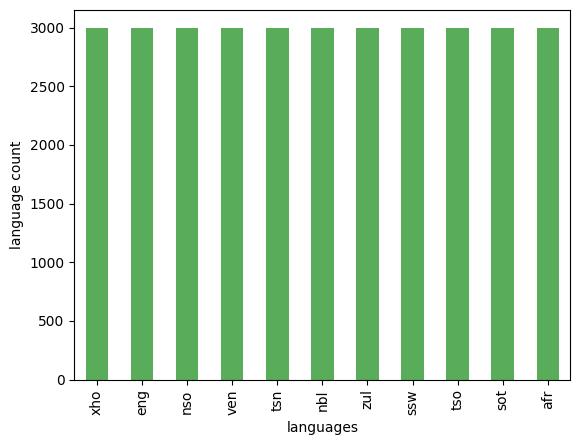

In [11]:
# Bar plot of label classes
fig,ax = plt.subplots()
df_train['lang_id'].value_counts().plot(kind = 'bar', facecolor='g', alpha=0.65)
ax.set_xlabel('languages')
ax.set_ylabel('language count')
plt.show()

#### 4.2.1 taking a look at the text column <a class="anchor" id="sub_section_4_2_1"></a>

In [12]:
#taking a look at the text column
df_train['text']

0        umgaqo-siseko wenza amalungiselelo kumaziko ax...
1        i-dha iya kuba nobulumko bokubeka umsebenzi na...
2        the province of kwazulu-natal department of tr...
3        o netefatša gore o ba file dilo ka moka tše le...
4        khomishini ya ndinganyiso ya mbeu yo ewa maana...
                               ...                        
32995    popo ya dipolateforomo tse ke go tlisa boetele...
32996    modise mosadi na o ntse o sa utlwe hore thaban...
32997    closing date for the submission of completed t...
32998    nawuphina umntu ofunyenwe enetyala phantsi kwa...
32999    mafapha a mang le ona a lokela ho etsa ditlale...
Name: text, Length: 33000, dtype: object

<br/><br/>
<a id='five'></a>
## 5. CLEAN THE DATA <a class="anchor" id="chapter5"></a>
<a href=#cont>Back to Table of Contents</a>



Before doing any analysis on the data for insights, it is essential to clean the data first. 
Cleaning the data will ensure that accurate insights are retrieved in the analysis phase. 
Cleaning the data will consist of checking for null, empty, missing and duplicated values.<br/>

### 5.1 Remove Punctuations<a class="anchor" id="section_5_1"></a>
Punctuations are the marks in English like commas, hyphens, full stops, etc. These are important for English grammar but not for text analysis. Therefore, they need to be removed:

#### 5.1.1 Remove Punctuations from train <a class="anchor" id="sub_section_5_1_1"></a>

In [13]:
import string

def remove_punct(text):
    # Define a translation table
    translator = str.maketrans('', '', string.punctuation)
    
    # Use the translation table to remove punctuation
    text_without_punct = text.translate(translator)
    
    return text_without_punct

# Applying the remove_punct function to the 'text' column
df_train['text_m'] = df_train['text'].apply(lambda x: remove_punct(x))

# Display the DataFrame after applying the function
df_train.head()


,lang_id,text,text_m
0,xho,umgaqo-siseko wenza amalungiselelo kumaziko ax...,umgaqosiseko wenza amalungiselelo kumaziko axh...
1,xho,i-dha iya kuba nobulumko bokubeka umsebenzi na...,idha iya kuba nobulumko bokubeka umsebenzi nap...
2,eng,the province of kwazulu-natal department of tr...,the province of kwazulunatal department of tra...
3,nso,o netefatša gore o ba file dilo ka moka tše le...,o netefatša gore o ba file dilo ka moka tše le...
4,ven,khomishini ya ndinganyiso ya mbeu yo ewa maana...,khomishini ya ndinganyiso ya mbeu yo ewa maana...


In [14]:
#applying the remove_punct function 
df_train['text_m'] = df_train['text'].apply(lambda x: remove_punct(x))

df_train.head()

,lang_id,text,text_m
0,xho,umgaqo-siseko wenza amalungiselelo kumaziko ax...,umgaqosiseko wenza amalungiselelo kumaziko axh...
1,xho,i-dha iya kuba nobulumko bokubeka umsebenzi na...,idha iya kuba nobulumko bokubeka umsebenzi nap...
2,eng,the province of kwazulu-natal department of tr...,the province of kwazulunatal department of tra...
3,nso,o netefatša gore o ba file dilo ka moka tše le...,o netefatša gore o ba file dilo ka moka tše le...
4,ven,khomishini ya ndinganyiso ya mbeu yo ewa maana...,khomishini ya ndinganyiso ya mbeu yo ewa maana...


#### 5.1.2 Remove Punctuations from Test<a class="anchor" id="sub_section_5_1_2"></a>

In [15]:
df_test['text_m'] = df_test['text'].apply(lambda x: remove_punct(x))

df_test.head()

,index,text,text_m
0,1,"Mmasepala, fa maemo a a kgethegileng a letlele...",Mmasepala fa maemo a a kgethegileng a letlelel...
1,2,Uzakwaziswa ngokufaneleko nakungafuneka eminye...,Uzakwaziswa ngokufaneleko nakungafuneka eminye...
2,3,Tshivhumbeo tshi fana na ngano dza vhathu.,Tshivhumbeo tshi fana na ngano dza vhathu
3,4,Kube inja nelikati betingevakala kutsi titsini...,Kube inja nelikati betingevakala kutsi titsini...
4,5,Winste op buitelandse valuta.,Winste op buitelandse valuta


<br/><br/>
### 5.2. Drop Duplicate Columns <a class="anchor" id="section_5_2"></a>
This method removes all columns of the same name beside the first occurrence of the column also removes columns that have the same data with the different column name.

In [16]:
# Drop duplicate columns
df2 = df_train.T.drop_duplicates().T

# Use groupby() to drop duplicate columns
df2 = df_train.T.groupby(level=0).first().T

# Remove duplicate columns pandas DataFrame
df2 = df_train.loc[:,~df_train.columns.duplicated()]

# Remove repeted columns in a DataFrame
df2 = df_train.loc[:,~df_train.T.duplicated(keep='first')]

# keep last duplicate columns
df2 = df_train.loc[:,~df_train.T.duplicated(keep='last')]

# Use DataFrame.columns.duplicated() to drop duplicate columns
duplicate_cols = df_train.columns[df_train.columns.duplicated()]
df_train.drop(columns=duplicate_cols, inplace=True)

df_train.head()

,lang_id,text,text_m
0,xho,umgaqo-siseko wenza amalungiselelo kumaziko ax...,umgaqosiseko wenza amalungiselelo kumaziko axh...
1,xho,i-dha iya kuba nobulumko bokubeka umsebenzi na...,idha iya kuba nobulumko bokubeka umsebenzi nap...
2,eng,the province of kwazulu-natal department of tr...,the province of kwazulunatal department of tra...
3,nso,o netefatša gore o ba file dilo ka moka tše le...,o netefatša gore o ba file dilo ka moka tše le...
4,ven,khomishini ya ndinganyiso ya mbeu yo ewa maana...,khomishini ya ndinganyiso ya mbeu yo ewa maana...


#### 5.2.1 Lowercase the reviews <a class="anchor" id="sub_section_5_2_1"></a>
In NLP, models treat words like Goat and goat differently, even if they are the same. Therefore, to overcome this problem, we lowercase the words. Here, I am using the lower() function available in Python for converting text to lowercase:

In [17]:
df_test['text']=df_test['text'].apply(lambda x: x.lower())
df_train.head()

,lang_id,text,text_m
0,xho,umgaqo-siseko wenza amalungiselelo kumaziko ax...,umgaqosiseko wenza amalungiselelo kumaziko axh...
1,xho,i-dha iya kuba nobulumko bokubeka umsebenzi na...,idha iya kuba nobulumko bokubeka umsebenzi nap...
2,eng,the province of kwazulu-natal department of tr...,the province of kwazulunatal department of tra...
3,nso,o netefatša gore o ba file dilo ka moka tše le...,o netefatša gore o ba file dilo ka moka tše le...
4,ven,khomishini ya ndinganyiso ya mbeu yo ewa maana...,khomishini ya ndinganyiso ya mbeu yo ewa maana...


#### 5.2.2 Remove digits and words containing digits <a class="anchor" id="sub_section_5_2_2"></a>
Next, we need to remove numbers and words containing digits from the reviews. I am doing this because digits and words containing digits do not give much importance to the main words. To do this, I am using regular expressions with lambda functions.

In [18]:
df_test['text']=df_test['text'].apply(lambda x: re.sub('\w*\d\w*','', x))
df_train.head()

,lang_id,text,text_m
0,xho,umgaqo-siseko wenza amalungiselelo kumaziko ax...,umgaqosiseko wenza amalungiselelo kumaziko axh...
1,xho,i-dha iya kuba nobulumko bokubeka umsebenzi na...,idha iya kuba nobulumko bokubeka umsebenzi nap...
2,eng,the province of kwazulu-natal department of tr...,the province of kwazulunatal department of tra...
3,nso,o netefatša gore o ba file dilo ka moka tše le...,o netefatša gore o ba file dilo ka moka tše le...
4,ven,khomishini ya ndinganyiso ya mbeu yo ewa maana...,khomishini ya ndinganyiso ya mbeu yo ewa maana...


Here, string.punctuations function contains all the punctuations and we use regular expressions to search them in the text and remove them. 

In [19]:
# Removing extra spaces
df_test['text']=df_test['text'].apply(lambda x: re.sub(' +',' ',x))
df_train.head()

,lang_id,text,text_m
0,xho,umgaqo-siseko wenza amalungiselelo kumaziko ax...,umgaqosiseko wenza amalungiselelo kumaziko axh...
1,xho,i-dha iya kuba nobulumko bokubeka umsebenzi na...,idha iya kuba nobulumko bokubeka umsebenzi nap...
2,eng,the province of kwazulu-natal department of tr...,the province of kwazulunatal department of tra...
3,nso,o netefatša gore o ba file dilo ka moka tše le...,o netefatša gore o ba file dilo ka moka tše le...
4,ven,khomishini ya ndinganyiso ya mbeu yo ewa maana...,khomishini ya ndinganyiso ya mbeu yo ewa maana...


In [20]:
for index,text in enumerate(df_test['text'][35:40]):
  print('Review %d:\n'%(index+1),text)

Review 1:
 tensy 'n ooreenkoms, waarna in artikel of verwys word, aangegaan is, of behalwe deur middel van 'n kommunikasiepyp, voorsien ingevolge artikel , of van 'n brandkraan voorsien ingevolge artikel , of behalwe deur middel van 'n gemeterde watervoorsieningspunt, aangebring deur die munisipaliteit.
Review 2:
 o na le kholego ya go ikoka ka bowena yeo e go dumelelago gore o kgone go hwetša kalafi ya malwetši a bjale ka go opelwa ke hlogo, mefikela goba ogems e tla go fetola semetseng ka sms ka tshedimošo ya go ikgokaganya longwa ke mal se se ra gore: dikalafi tše sa hlokego lengwalo la kalafi go tšwaye e nago le dingaka tša meeno tša go fihla go tše tharo mo tikologong ya go ngaka ya gago.
Review 3:
 ukuba ngaba isigqeba sephondo esilawulayo asikwazi okanye aside siwasebenzise amagunya aso okanye siwenze lo msebenzi ukhankanywe kwicandelwana () okanye (), isigqeba seziphathamandla ezilawulayo sesizwe kufuneka singenelele ngokwecandelwana () okanye () endaweni yeso sigqeba sephondo 

---
<a id='six'></a>
# 6. Feature Engineering <a class="anchor" id="chapter6"></a>
<a href=#cont>Back to Table of Contents</a>

<br/><br/>
In this Section we will be applying feature engineering to the data set before trying to model the data we first have to convert the data from `letters` to `numbers`

In [21]:
#select the feature and the target variable
X = df_train['text']
y = df_train['lang_id']

### 6.1 Label Encoder <a class="anchor" id="section_6_1"></a>
We will instantiate labelEncoder we will be using the label encoder to encode the target variable from categorical to numerical values

In [22]:
#instantiation of labelEncoder
le = LabelEncoder()

In [23]:
#transform the target variable to numbers
y = le.fit_transform(y)

### 6.2 ContVectorizer <a class="anchor" id="section_6_2"></a>
Next, using the ContVectorizer we will transform the feature

#### 6.2.1 Applying  ContVectorizer to Train Data <a class="anchor" id="sub_section_6_2_1"></a>

In [24]:
#using countVectoerizer
vectorizer = CountVectorizer()

In [25]:
#transforming the feature variable
X_count = vectorizer.fit_transform(X)

In [26]:
#shape of the feature after applying the countvectorizer
X_count.shape

(33000, 141958)

#### 6.2.2 Applying ContVectorizer to Test Data <a class="anchor" id="sub_section_6_2_2"></a>

In [27]:
#applying countVectorizer on the test dataset
x_test = vectorizer.transform(df_test['text'])

In [28]:
#shape of the feature after applying the countvectorizer
X_count.shape

(33000, 141958)

### 6.3 Split Data <a class="anchor" id="section_6_3"></a>
Next up we will split our dataset into training and test data using `train_test_split`

In [29]:
# Split Data (into Training & Test)
X_train, X_test, y_train, y_test = train_test_split(X_count, y, test_size=0.26, random_state=0)

---
<a id='seven'></a>
# 7. Modeling<a class="anchor" id="chapter7"></a>
<a href=#cont>Back to Table of Contents</a>

<br/><br/>
This section of the project focuses on the creation, training and evaluation of classification models. The created models are evaluated on accuracy, precision and recall metrics to select the best for the target purpose.  

In [31]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.linear_model import RidgeClassifier


In [32]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.linear_model import RidgeClassifier

# Instantiate classifiers
clf = RandomForestClassifier(random_state=42)
knn = KNeighborsClassifier(leaf_size=5, n_neighbors=7, p=1)
naive_bayes = MultinomialNB(alpha=0.5, class_prior=None, fit_prior=False)
lsvc = LinearSVC(C=0.49417133613238384, class_weight=None, dual=True,
                 fit_intercept=True, intercept_scaling=1, loss='squared_hinge',
                 max_iter=3000, multi_class='ovr', penalty='l2', random_state=None,
                 tol=0.001, verbose=1) 
ridge = RidgeClassifier(alpha=13.428675439323859, class_weight=None, copy_X=True,
                        fit_intercept=True, max_iter=None, random_state=None,
                        solver='auto', tol=0.001)


In [35]:
from sklearn.linear_model import LogisticRegression

ridge = LogisticRegression(penalty='l2', C=1.0, fit_intercept=True, normalize=False, solver='liblinear')


TypeError: LogisticRegression.__init__() got an unexpected keyword argument 'normalize'

In [33]:
#modeling 
clf = RandomForestClassifier(random_state = 42)
knn = KNeighborsClassifier(leaf_size = 5, n_neighbors=7, p=1)
naive_bayes = MultinomialNB(alpha=0.5, class_prior=None, fit_prior=False)
lsvc = LinearSVC(C=0.49417133613238384, class_weight=None, dual=True,
          fit_intercept=True, intercept_scaling=1, loss='squared_hinge',
          max_iter=3000, multi_class='ovr', penalty='l2', random_state=None,
          tol=0.001, verbose=1) 
ridge = RidgeClassifier(alpha=13.428675439323859, class_weight=None, copy_X=True,
                fit_intercept=True, max_iter=None, normalize=False,
                random_state=None, solver='auto', tol=0.001) 

TypeError: RidgeClassifier.__init__() got an unexpected keyword argument 'normalize'

### 7.1 Fitting the Model <a class="anchor" id="section_7_1"></a>

In [34]:
#fitting the model
clf.fit(X_train, y_train)
knn.fit(X_train, y_train)
naive_bayes.fit(X_train, y_train)
lsvc.fit(X_train, y_train)
ridge.fit(X_train, y_train)

[LibLinear]

RidgeClassifier(alpha=13.42867543932386, tol=0.001)

### 7.2 Applying Prediction to the Model <a class="anchor" id="section_7_2"></a>

In [36]:
# Assuming X_train and y_train are your training data

# Fit the classifiers on the training data
clf.fit(X_train, y_train)
knn.fit(X_train, y_train)
naive_bayes.fit(X_train, y_train)
lsvc.fit(X_train, y_train)
ridge.fit(X_train, y_train)


[LibLinear]

RidgeClassifier(alpha=13.42867543932386, tol=0.001)

In [38]:
# Assuming you have trained the classifiers (clf, knn, naive_bayes, lsvc, ridge) on your training data

# Apply predictions to the models
y_pred = clf.predict(X_test)
y_knn = knn.predict(X_test)
y_nv = naive_bayes.predict(X_test)
y_lsvc = lsvc.predict(X_test)
y_ridge = ridge.predict(X_test)



KeyboardInterrupt



---
<a id='eight'></a>
# 8. Model performances <a class="anchor" id="chapter8"></a>
<a href=#cont>Back to Table of Contents</a>

Model Evaluation In this section we will evalute the above trained models to which model has the the best performance i.e the model with the highest `F1_score` and making sure that the model is not `over` or `under fitting` the data

In [40]:
from sklearn.metrics import f1_score

# Assuming you have already predicted values for each model
y_knn_pred = knn.predict(X_test)
y_pred_clf = clf.predict(X_test)
y_nv_pred = naive_bayes.predict(X_test)
y_lsvc_pred = lsvc.predict(X_test)
y_ridge_pred = ridge.predict(X_test)

# Compute the f1_score for each model
f1_knn = f1_score(y_test, y_knn_pred, average='weighted')
print("The f1_score of the knn model is: {}".format(f1_knn))

f1_clf = f1_score(y_test, y_pred_clf, average='weighted')
print("The f1_score of the RandomForestClassifier model is: {}".format(f1_clf))

f1_naivebayes = f1_score(y_test, y_nv_pred, average='weighted')
print("The f1_score of the Naive Bayes model is: {}".format(f1_naivebayes))

f1_lsvc = f1_score(y_test, y_lsvc_pred, average='weighted')
print("The f1_score of the LinearSVC model is: {}".format(f1_lsvc))

f1_ridge = f1_score(y_test, y_ridge_pred, average='weighted')
print("The f1_score of the RidgeClassifier model is: {}".format(f1_ridge))


The f1_score of the knn model is: 0.9353056314066053
The f1_score of the RandomForestClassifier model is: 0.9878962976064161
The f1_score of the Naive Bayes model is: 0.9994172682344664
The f1_score of the LinearSVC model is: 0.9966216271083593
The f1_score of the RidgeClassifier model is: 0.9975542220118107


In [41]:
performance = pd.DataFrame([f1_knn, f1_clf, f1_naivebayes, f1_lsvc, f1_ridge], columns=['F1_Scores'])
performance.head()

,F1_Scores
0,0.935306
1,0.987896
2,0.999417
3,0.996622
4,0.997554


### 8.1 Using Seaborn's Countplot function<a class="anchor" id="section_8_1"></a>

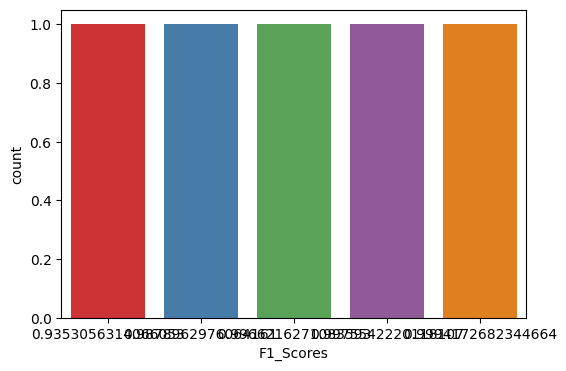

In [42]:
#using seaborn's countplot function
fig, axis = plt.subplots(figsize=(6, 4))
axis = sns.countplot(x='F1_Scores',data=performance, palette="Set1")
plt.show()

**Obsrvation**<br/>
Will as you can see the model with the best performace here is `naive bayes` model it has the highest F1_score compared to the other 4 models.

### 8.2 Applying the model to make prediction on an unseen data<a class="anchor" id="section_8_2"></a>

In this Section we will apply the model on the test dataset

In [43]:
#making predictions
prediction = lsvc.predict(x_test)

In [44]:
#transforming the prediction from numbers to word
prediction = le.inverse_transform(prediction)
prediction

array(['tsn', 'nbl', 'ven', ..., 'sot', 'sot', 'ssw'], dtype=object)

### 8.3 Creating a dataframe for the prediction <a class="anchor" id="section_8_3"></a>

In [45]:
submission = pd.DataFrame(list(zip(df_test['index'], prediction)), columns=['index', 'lang_id'])

In [46]:
submission.head()

,index,lang_id
0,1,tsn
1,2,nbl
2,3,ven
3,4,ssw
4,5,ssw


## 8.4 saving the file as csv for submission <a class="anchor" id="section_8_4"></a>

In [49]:
#saving the file as csv for submission
submission.to_csv('submission_.csv', index=False, index_label=False)